## **Mount at Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


<br/>

## **Getting the data**

In [ ]:
import pandas_datareader as pdr

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key = 'key')


In [ ]:
df.to_csv('drive/My Drive/AAPL.csv')

<br/>

## **Importing necessary modules**

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM


<br/>

## **Load and reconnaissance of the dataset**

In [ ]:
df = pd.read_csv('drive/My Drive/AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-09-10 00:00:00+00:00,112.57,113.2825,109.90,110.27,62892831,26.003131,26.167715,25.386374,25.471842,251571324,0.0,1.0
1,AAPL,2015-09-11 00:00:00+00:00,114.21,114.2100,111.76,111.79,49915473,26.381964,26.381964,25.816025,25.822955,199661892,0.0,1.0
2,AAPL,2015-09-14 00:00:00+00:00,115.31,116.8900,114.86,116.58,58363431,26.636058,27.001031,26.532110,26.929422,233453724,0.0,1.0
3,AAPL,2015-09-15 00:00:00+00:00,116.28,116.5300,114.42,115.93,43341155,26.860124,26.917872,26.430473,26.779275,173364620,0.0,1.0
4,AAPL,2015-09-16 00:00:00+00:00,116.41,116.5400,115.44,116.25,37173489,26.890153,26.920182,26.666088,26.853194,148693956,0.0,1.0


<br/>

## **Taking only 'close' feature to work with**

In [ ]:
df1 = df.reset_index()['close']

In [ ]:
df1.shape

(1257,)

In [ ]:
df1.isnull().sum()

0

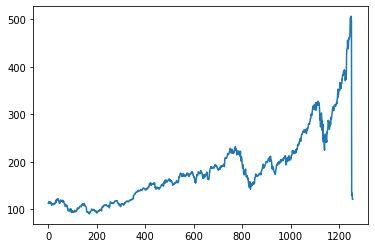

In [ ]:
plt.plot(df1)
plt.show()

<br/>

## **Normalize and reshaping**

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [ ]:
df1.shape

(1257, 1)

In [ ]:
df1

array([[0.05346963],
       [0.05741431],
       [0.06006013],
       ...,
       [0.09876127],
       [0.07345761],
       [0.07365003]])

<br/>

## **Splitting into train and test**
But this splitting has a little bit difference from the splitting we have seen for **Machine Learning** models. In this splitting, we will take data of a certain time period as train set, and the data next to that period will be considered as test set.


In [ ]:
train_size = int(len(df1)*0.65)
test_size = len(df1) - train_size

In [ ]:
print('Train size : {}'.format(train_size))
print('test size : {}'.format(test_size))

Train size : 817
test size : 440


In [ ]:
train, test = df1[0:train_size, :], df1[train_size:len(df1), :1]

In [ ]:
print('Length of Train size : {}'.format(len(train)))
print('Length of test size : {}'.format(len(test)))

Length of Train size : 817
Length of test size : 440


<br/>

## **Creating the dataset**
Here we will create the explanatory and response variable for our model. To do that, We will have to choose the time_step first. Here we used 100 as time_step. What does it mean?  
It actually means that the first 100 values of train set will be the features and their response variable or output will be the 1st value of test set.

In [ ]:
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [], []
  for i in range(len(dataset) - time_step -1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i+ time_step, 0])

  return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

In [ ]:
print('Shape of X_train : {}'.format(X_train.shape))
print('Shape of y_train : {}'.format(y_train.shape))
print('Shape of X_test : {}'.format(X_test.shape))
print('Shape of y_test : {}'.format(y_test.shape))

Shape of X_train : (716, 100)
Shape of y_train : (716,)
Shape of X_test : (339, 100)
Shape of y_test : (339,)


In [ ]:
X_train[0]

array([0.05346963, 0.05741431, 0.06006013, 0.06239327, 0.06270595,
       0.05671678, 0.05558629, 0.0598196 , 0.05546603, 0.05767889,
       0.05931449, 0.05861696, 0.05315695, 0.04502706, 0.04716777,
       0.04627781, 0.04820204, 0.04916416, 0.05043897, 0.04916416,
       0.04608539, 0.05238725, 0.0511365 , 0.05159351, 0.04779314,
       0.05176188, 0.04978954, 0.05144919, 0.05635598, 0.05633193,
       0.06051714, 0.06912808, 0.05998797, 0.05823211, 0.06958509,
       0.07261575, 0.0701383 , 0.07417919, 0.07752255, 0.07615153,
       0.07355382, 0.07389056, 0.07271197, 0.06357186, 0.06198437,
       0.0610463 , 0.05291642, 0.05733013, 0.05616356, 0.06482261,
       0.06840649, 0.06965725, 0.06592904, 0.06864702, 0.06660253,
       0.06607336, 0.06725195, 0.06494287, 0.06239327, 0.05979555,
       0.06900782, 0.06720385, 0.06708358, 0.06080577, 0.06212868,
       0.05493686, 0.05325316, 0.04846663, 0.05051112, 0.04483464,
       0.03773903, 0.0408659 , 0.04062538, 0.04394468, 0.04254

In [ ]:
y_train[0]

0.014455802766085352

<br/>

## **Reshaping**  
Now for training our model, we have to reshape the X_train and X_test to 3 Dimension.

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
print('Shape of X_train : {}'.format(X_train.shape))
print('Shape of X_test : {}'.format(X_test.shape))


Shape of X_train : (716, 100, 1)
Shape of X_test : (339, 100, 1)


<br/>

## **Model Architecture**

In [ ]:
model = Sequential()

model.add(LSTM(50, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


<br/>

## **Train the model**

In [ ]:
history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test), batch_size = 64, verbose = 1)

Epoch 1/100
12/12 [==============================] - 1s 90ms/step - loss: 0.0011 - val_loss: 0.0109
Epoch 2/100
12/12 [==============================] - 0s 21ms/step - loss: 4.8915e-04 - val_loss: 0.0100
Epoch 3/100
12/12 [==============================] - 0s 27ms/step - loss: 3.4036e-04 - val_loss: 0.0108
Epoch 4/100
12/12 [==============================] - 0s 16ms/step - loss: 3.1289e-04 - val_loss: 0.0096
Epoch 5/100
12/12 [==============================] - 0s 16ms/step - loss: 2.9368e-04 - val_loss: 0.0102
Epoch 6/100
12/12 [==============================] - 0s 17ms/step - loss: 2.7919e-04 - val_loss: 0.0104
Epoch 7/100
12/12 [==============================] - 0s 16ms/step - loss: 2.7831e-04 - val_loss: 0.0109
Epoch 8/100
12/12 [==============================] - 0s 16ms/step - loss: 2.7089e-04 - val_loss: 0.0108
Epoch 9/100
12/12 [==============================] - 0s 16ms/step - loss: 2.4995e-04 - val_loss: 0.0106
Epoch 10/100
12/12 [==============================] - 0s 16ms/step -

<br/>

## **Loss vs Epochs**

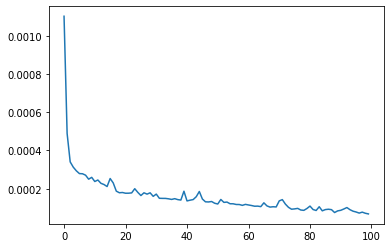

In [ ]:
plt.plot(history.history['loss'])
plt.show()

<br/>

## **Prediction**

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

<br/>

## **Inverse Scaling**
As we scale the data, now we have to inverse them to calculate mean_squared_error.

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

<br/>

## **Mean squared error**

In [ ]:
print('Training accuracy : {}'.format(math.sqrt(mean_squared_error(y_train, train_predict))))
print('Testing accuracy : {}'.format(math.sqrt(mean_squared_error(y_test, test_predict))))

Training accuracy : 154.96237892026554
Testing accuracy : 287.99691927443564


<br/>

## **Predict the next 30**

In [ ]:
len(test)

440

In [ ]:
x_input=test[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.03880415]
101
1 day input [0.46292243 0.44880337 0.42821407 0.44680698 0.44423331 0.46333133
 0.46381239 0.4527721  0.47478052 0.48938064 0.47800361 0.48784125
 0.49842453 0.50580878 0.51328924 0.52865905 0.54039687 0.53173782
 0.52269393 0.52723993 0.52283824 0.54027661 0.53589898 0.5505472
 0.54482261 0.5497294  0.54453397 0.54785328 0.54819002 0.54744438
 0.55684907 0.56043295 0.56471437 0.55797956 0.58006013 0.5847745
 0.61010222 0.63138906 0.59064342 0.59761876 0.60769693 0.62956103
 0.62838244 0.62871918 0.62388455 0.64589296 0.6643175  0.64875526
 0.66025256 0.63328924 0.65289236 0.66015634 0.65849669 0.65849669
 0.68192423 0.6791341  0.70001203 0.7039567  0.70556825 0.70131088
 0.71651233 0.72293446 0.711365   0.70948888 0.72901984 0.71595911
 0.71858088 0.67598316 0.67377029 0.69488876 0.67990379 0.69710162
 0.70816597 0.80505111 0.83081179 0.83781118 0.8416356  0.87858088
 0.85173782 0.86727601 0.83502105 0.86999399 0.88923632 0.88825015
 0.8853638  0.89455201 0.89594708 0

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

1257

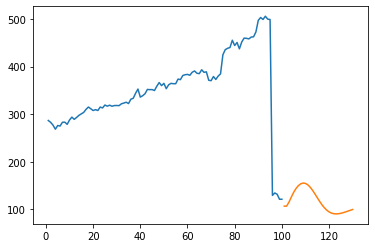

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

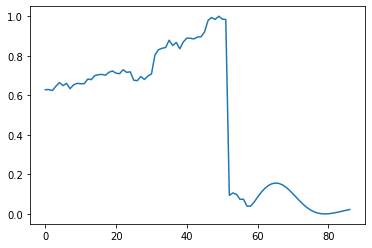

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

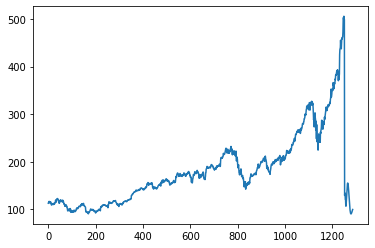

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)